In [1]:
from __future__ import print_function
import pandas as pd
import numpy as np
from itertools import product
import sys,os
import time

import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.append(os.path.abspath("/home/olya/SFU/Breast_cancer/DESMOND/"))

from find_optimal_parameters import parse_biclust,read_true_bics,read_all_results
from find_optimal_parameters import  plot_F1_heatmap,get_opt_params,F1_per_bic

%matplotlib inline

In [2]:
# and prefix of input file name
fname_prefix = "simulated.N=10.Mu=2.0.GxP="
# suffix idication overlap type
overlap = "TT"
# where are output files
out_dir = "../simulated_datasets/results/"

# sizes of biclusters
g_sizes = [5,10,20,50,100]
s_sizes = [10,20,50,100]

# true biclusters 
true_bic_dir = "../simulated_datasets/true_biclusters/"
true_bic_fname_prefix = fname_prefix
true_bic_fname_suffix = ".overlap="+overlap+".biclusters.txt"

In [3]:
# predicted biclusters 
tool_name = "FABIA"
tool_suffix = "Fabia"
n_runs = 10

parameters = (("alpha",[0.001,0.005,0.01,0.05,0.1,0.5]),
              ("spl",[0,0.25,0.5,0.75,1,1.5,2]),
              ("spz",[0,0.25,0.5,0.75,1,1.5,2]))

pred_bic_dir =  out_dir+tool_name+"/"
pred_bic_fname_prefix = fname_prefix
pred_bic_fname_suffix = ".overlap="+overlap+"."+tool_suffix+".biclust_results.txt"

img_outdir = out_dir + "/F1/img"
tsv_outdir = out_dir + "/F1/"

In [7]:
results= read_all_results(parameters,tool_name,n_runs=n_runs,
                          pred_bic_dir=pred_bic_dir,
                          pred_bic_fname_prefix=fname_prefix,
                          pred_bic_fname_suffix=pred_bic_fname_suffix,
                          true_bic_dir=true_bic_dir,
                          true_bic_fname_prefix=fname_prefix,
                          true_bic_fname_suffix=true_bic_fname_suffix)

results_outfile =  tsv_outdir+ tool_suffix+".results.tsv"
results.to_csv(results_outfile ,sep="\t")

../simulated_datasets/results/FABIA/alpha=0.001.spl=0.25.spz=0/ does not found.
../simulated_datasets/results/FABIA/alpha=0.001.spl=0.25.spz=0.25/ does not found.
../simulated_datasets/results/FABIA/alpha=0.001.spl=0.25.spz=0.5/ does not found.
../simulated_datasets/results/FABIA/alpha=0.001.spl=0.25.spz=0.75/ does not found.
../simulated_datasets/results/FABIA/alpha=0.001.spl=0.25.spz=1/ does not found.
../simulated_datasets/results/FABIA/alpha=0.001.spl=0.25.spz=1.5/ does not found.
../simulated_datasets/results/FABIA/alpha=0.001.spl=0.25.spz=2/ does not found.
../simulated_datasets/results/FABIA/alpha=0.001.spl=0.5.spz=0.25/ does not found.
../simulated_datasets/results/FABIA/alpha=0.001.spl=0.5.spz=0.75/ does not found.
../simulated_datasets/results/FABIA/alpha=0.001.spl=0.75.spz=0/ does not found.
../simulated_datasets/results/FABIA/alpha=0.001.spl=0.75.spz=0.25/ does not found.
../simulated_datasets/results/FABIA/alpha=0.001.spl=0.75.spz=0.5/ does not found.
../simulated_datasets

Total combinations: 272
Total combinations: 272
Combinations with mean F1 > 0.1 196


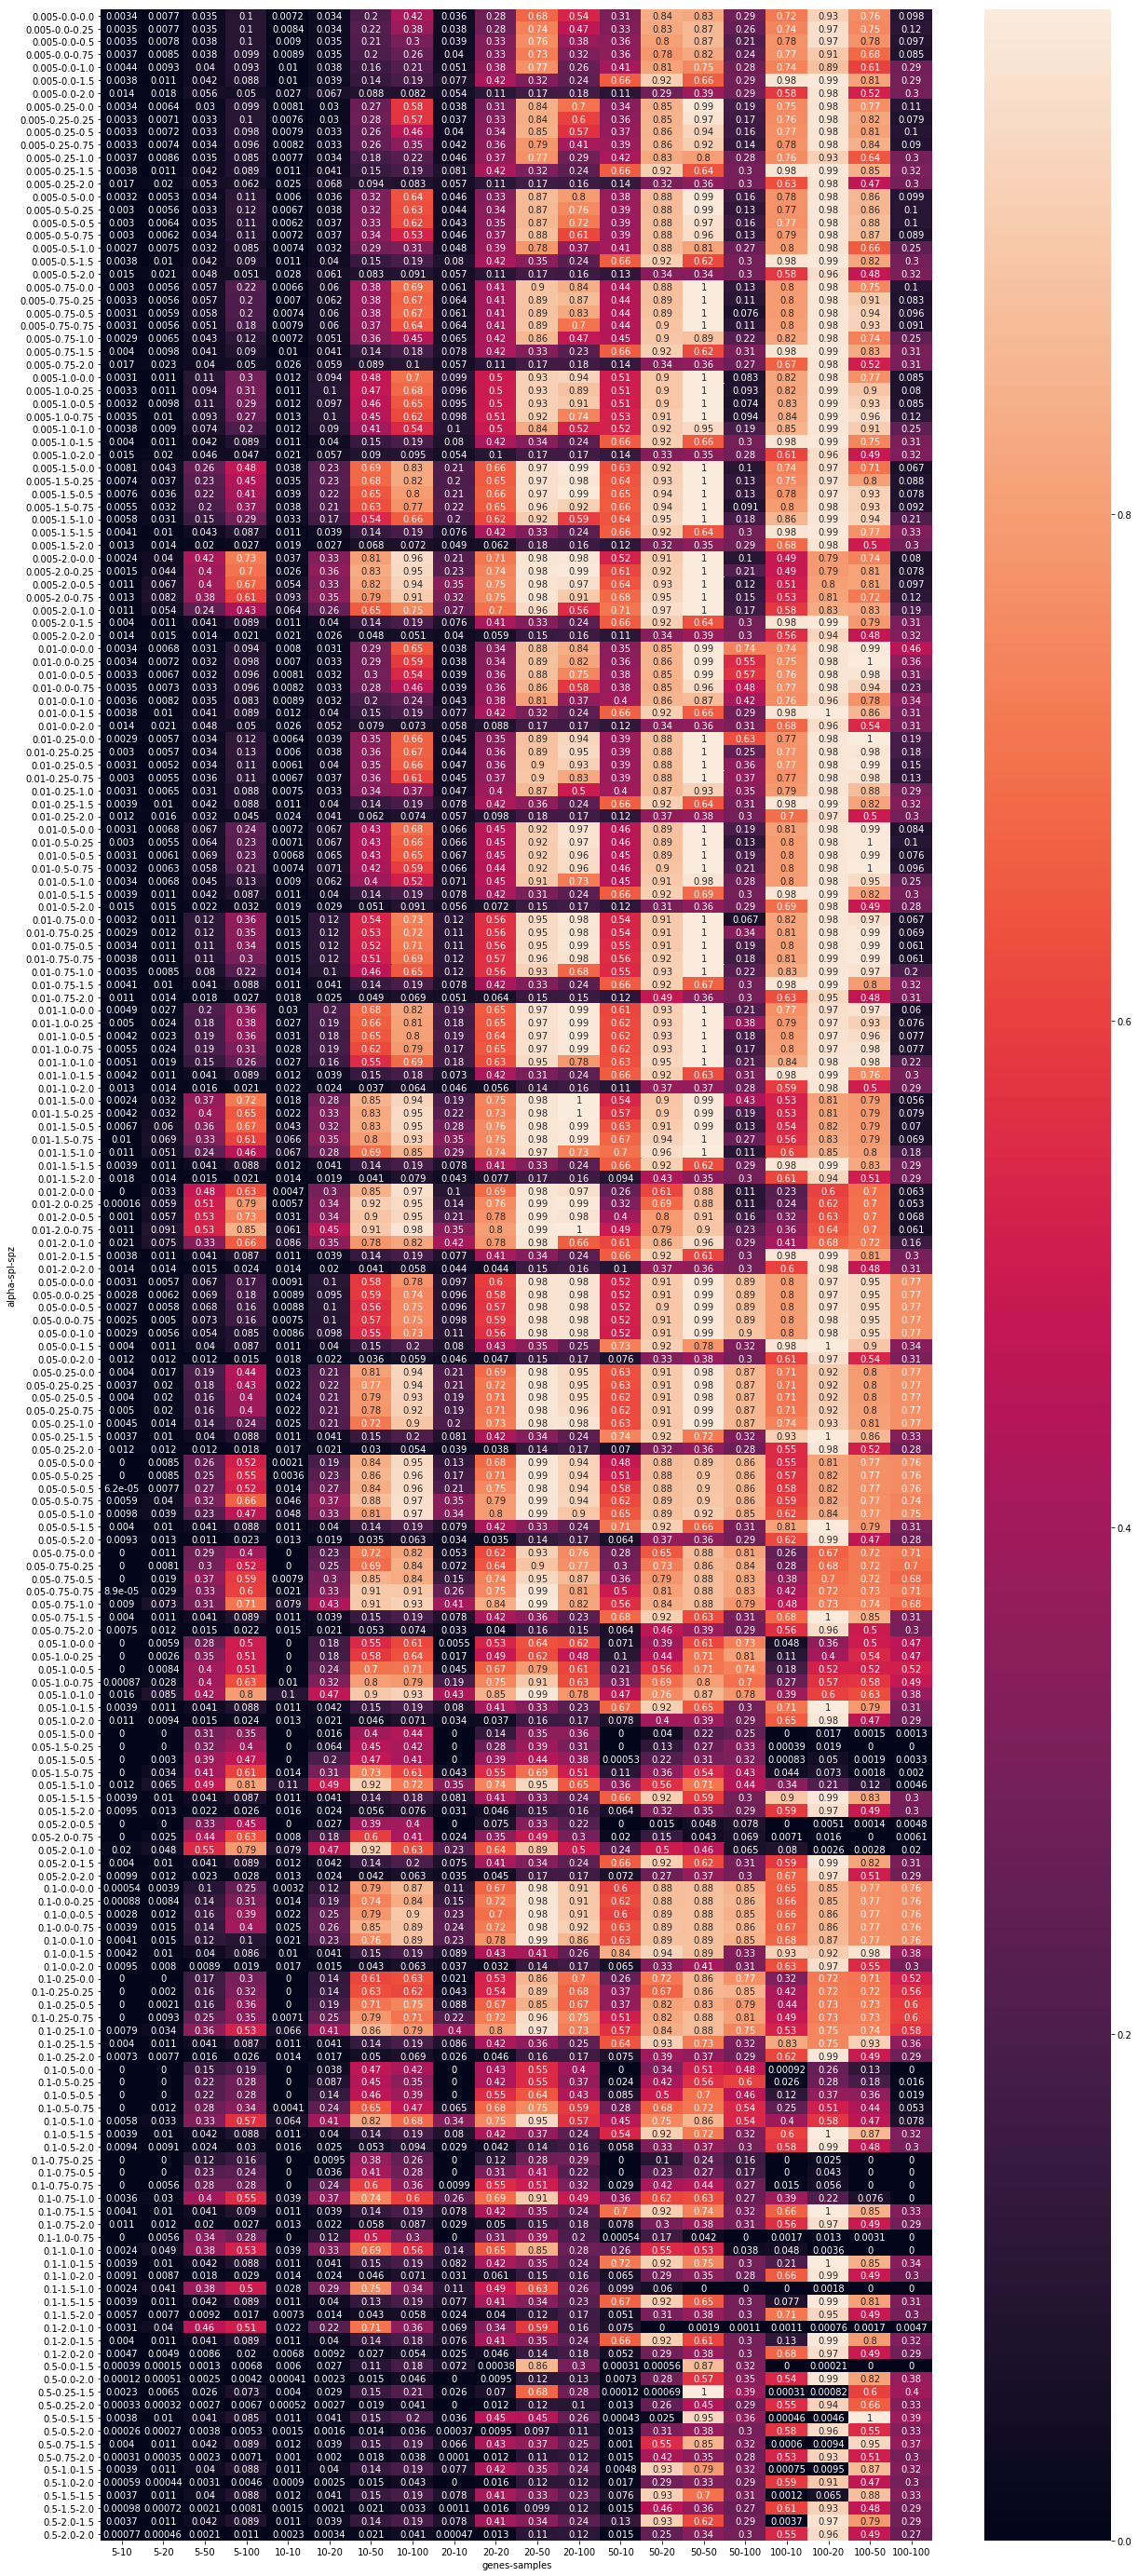

In [11]:
params = ["alpha","spl","spz"]
plot_file = img_outdir+"/" + tool_name+".F1_heatmap.svg"
heatmap_outfile =  tsv_outdir+ tool_name+".F1_heatmap.tsv"

heatmap = plot_F1_heatmap(results,params,f1_thr=0.1,
                          g_sizes = [5,10,20,50,100], s_sizes = [10,20,50,100],
                          plot=True,plot_file=plot_file,outfile=heatmap_outfile)

In [12]:
parameters

(('alpha', [0.001, 0.005, 0.01, 0.05, 0.1, 0.5]),
 ('spl', [0, 0.25, 0.5, 0.75, 1, 1.5, 2]),
 ('spz', [0, 0.25, 0.5, 0.75, 1, 1.5, 2]))

In [13]:
default_params = (0.01,0,0.5)

In [14]:
r = get_opt_params(results, params, default_params=default_params, more_n_smaples = 0)
r

All 54400 runs considered

Optimal parameters (max. avg. F1 per bicluster):
	alpha=0.05;
	spl=0.5;
	spz=0.75;
	Max. avg. F1 per bicluster:0.628±0.321
	avg. F1 per best match:0.632±0.317
	biclusters per run:10.2±0.4
With default parameters:
	alpha=0.01;
	spl=0;
	spz=0.5;
	avg. F1 per bicluster:0.443±0.374
	avg. F1 per best match:0.411±0.376
	biclusters per run:10.0±0.0


F1 per bicluster                                      \
                            mean       std count       max       min   
alpha spl  spz                                                         
0.050 0.50 0.75         0.627632  0.320580   200  0.986729  0.001390   
           1.00         0.610670  0.325210   200  0.987719  0.003747   
      0.75 1.00         0.610094  0.299628   200  0.989167  0.001887   
      0.25 0.00         0.602852  0.352249   200  0.984966  0.001631   
           0.25         0.601735  0.351548   200  0.984966  0.001908   
           0.75         0.598167  0.355603   200  0.985976  0.002482   
           0.50         0.597914  0.355102   200  0.984966  0.001959   
      0.50 0.50         0.594875  0.340513   200  0.984787  0.000000   
0.100 0.00 0.75         0.588653  0.341562   200  0.984825  0.000846   
0.050 0.25 1.00         0.588188  0.362159   200  0.987997  0.002486   
      0.50 0.25         0.586071  0.345349   200  0.986292  0.000000   
      1.00 1.00         0.582751  0.296087   200  0.986653  0.001468   
0.100 0.00 0.50         0.580423  0.338933   200  0.984825  0.001406   
      0.25 1.00         0.579153  0.288507   200  0.972025  0.002751   
0.050 0.75 0.75         0.576000  0.318049   200  0.987225  0.000000   
      0.50 0.00         0.575798  0.349001   200  0.986292  0.000000   
0.010 1.50 0.75         0.567942  0.344671   200  0.995029  0.001114   
0.100 0.00 1.00         0.566382  0.355000   200  0.985777  0.002303   
           0.25         0.564032  0.347067   200  0.980797  0.000000   
0.005 2.00 0.50         0.563092  0.349681   200  0.997030  0.001142   
0.010 2.00 0.75         0.560814  0.339319   200  0.997561  0.000339   
0.005 2.00 0.25         0.559146  0.357103   200  0.996019  0.000000   
0.010 1.50 0.00         0.558616  0.364868   200  0.997063  0.000000   
0.050 0.00 0.00         0.558287  0.386438   200  0.990988  0.002226   
0.010 1.50 0.50         0.557785  0.357476   200  0.994624  0.000643   
0.005 2.00 0.75         0.556938  0.336752   200  0.998020  0.003516   
0.050 0.00 0.25         0.556211  0.385876   200  0.990988  0.001785   
           0.75         0.555386  0.386913   200  0.990988  0.001995   
           0.50         0.553715  0.386359   200  0.990988  0.001976   
0.100 0.00 0.00         0.552759  0.361317   200  0.978283  0.000000   
...                          ...       ...   ...       ...       ...   
0.500 1.50 0.25         0.000000  0.000000   200  0.000000  0.000000   
           0.00         0.000000  0.000000   200  0.000000  0.000000   
      0.00 1.00         0.000000  0.000000   200  0.000000  0.000000   
      1.50 0.50         0.000000  0.000000   200  0.000000  0.000000   
           0.75         0.000000  0.000000   200  0.000000  0.000000   
      1.00 0.50         0.000000  0.000000   200  0.000000  0.000000   
      2.00 0.00         0.000000  0.000000   200  0.000000  0.000000   
           0.25         0.000000  0.000000   200  0.000000  0.000000   
           0.50         0.000000  0.000000   200  0.000000  0.000000   
           0.75         0.000000  0.000000   200  0.000000  0.000000   
      1.00 0.75         0.000000  0.000000   200  0.000000  0.000000   
           0.00         0.000000  0.000000   200  0.000000  0.000000   
           0.25         0.000000  0.000000   200  0.000000  0.000000   
      0.25 0.25         0.000000  0.000000   200  0.000000  0.000000   
           0.50         0.000000  0.000000   200  0.000000  0.000000   
           0.75         0.000000  0.000000   200  0.000000  0.000000   
           1.00         0.000000  0.000000   200  0.000000  0.000000   
      0.00 0.75         0.000000  0.000000   200  0.000000  0.000000   
           0.50         0.000000  0.000000   200  0.000000  0.000000   
      0.50 0.00         0.000000  0.000000   200  0.000000  0.000000   
           0.25         0.000000  0.000000   200  0.000000  0.000000   
           0.50         0.000000  0.000000   200  0.0000